<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Step_by_Step_Data_Anaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**SCIKIT-LEARN DESIGN**

1. Estimators: 
> Any object that estimates parameters is an estimator (e.g., an imputer is an estimator). The estimation is done by **fit()**. Any other parameter needed to guide the estimation process is considered a hyperparameter (such as an imputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).

2. Transformers
> Some estimators (such as an imputer) can *also* transform a dataset.  The transformation is performed by the **transform()** method with the dataset to transform as a parameter. It returns the transformed dataset. Transformers also have a convenience method called **fit_transform()** that is equivalent to calling **fit()** and then **transform()**.

```python
from sklearn.impute import SimpleImputer
imp = SimpleImputer( missing_values = np.nan, strategy='median')
df = imp.fit_transform(df)
```

3. Predictors
> Some estimators are capable of making predictions. The LinearRegression model is a predictor.  A predictor has a **predict()** method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a **score()** method that measures the quality of the predictions.

4. Inspection
> All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy), and all the estimator’s learned parameters are accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_).

5. Composition
> Existing building blocks should be reused. For example, it is useful to create a *Pipeline* estimator from an arbitrary sequence of transformers followed by a final estimator.

#Auto MPG Data Set

* [Data Source](http://archive.ics.uci.edu/ml/datasets/Auto+MPG) 
* [Markdown Resource](https://towardsdatascience.com/cheat-sheet-for-google-colab-63853778c093)

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

#column names
column_names = [ 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'company', 'name']

#the data didn't have headers so I wrote them in
df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Data/Auto%20MPG%20Data%20Set.csv", header=None, names = column_names)

#the original headers become the first row, since I set header = None, so I need to delete the 0 row to get rid of it
df = df.drop(0)

#create a second copy of the data just in case
df_original = df

#check the dimensions of the data
print('The dimensions of the data are: ', df.shape)

#show the beginning of the data
df.head()

The dimensions of the data are:  (398, 10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company,name
1,18,8,307,130.0,3504,12,70,1,chevrolet,chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick,skylark 320
3,18,8,318,150.0,3436,11,70,1,plymouth,satellite
4,16,8,304,150.0,3433,12,70,1,amc,rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford,torino


In [ ]:
#check if we have any empty data
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
company         0
name            2
dtype: int64

In [ ]:
#check how many unique values we have in each column
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
company          36
name            299
dtype: int64

# Delete a Column

The name column seems superfluous. There are almost as many names as rows in the data, and it is categorical data that does not have any meaningful resolution in this formate, as such, I will delete it (and update df_original as well). 

In [ ]:
#delete the name column
df = df.drop(['name'],axis = 1)
df_original = df

#reset column_names so that 'name', which was taken out is not in there
column_names.remove('name')

#check the type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 1 to 398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           398 non-null    object
 1   cylinders     398 non-null    object
 2   displacement  398 non-null    object
 3   horsepower    398 non-null    object
 4   weight        398 non-null    object
 5   acceleration  398 non-null    object
 6   model year    398 non-null    object
 7   origin        398 non-null    object
 8   company       398 non-null    object
dtypes: object(9)
memory usage: 31.1+ KB


#Change to Numeric Data

I see that the format I downloaded data in is not numeric, for the mpg column, etc. it should be though. I will change the relevant columns and check the data type a second time.

I will change it based off of this information: 
Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)



#Trial and Lots of Errors

I attempted to convert everything but 'company' into numeric data using pd.to_numeric, however, I was getting parsing errors because the horsepower column had '?' which could not be changed.  Instead, I converted everything but horsepower and dealt with it separately.

The first thing I did was test to see what the issue was. Then I converted it to NaNs from '?', and then was able to convert it to float64.

In [ ]:
#convert everything but horsepower to numeric data
df[['mpg','cylinders','displacement','weight','acceleration','model year', 'origin']] = \
    df[['mpg','cylinders','displacement','weight','acceleration','model year', 'origin']].apply(pd.to_numeric)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company
1,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
2,15.0,8,350.0,165.0,3693,11.5,70,1,buick
3,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
4,16.0,8,304.0,150.0,3433,12.0,70,1,amc
5,17.0,8,302.0,140.0,3449,10.5,70,1,ford


In [ ]:
#test what the issue is with horsepower
#we see that there are several '?' in the data and that is stopping us from converting it, unless we use coerce
errors = pd.DataFrame(df[pd.to_numeric(df.horsepower, errors='coerce').isnull()])
errors.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company
33,25.0,4,98.0,?,2046,19.0,71,1,ford
127,21.0,6,200.0,?,2875,17.0,74,1,ford
331,40.9,4,85.0,?,1835,17.3,80,2,renault
337,23.6,4,140.0,?,2905,14.3,80,1,ford
355,34.5,4,100.0,?,2320,15.8,81,2,renault


In [ ]:
#because I would like to impute later, and veiw the rest of the data as float64s, I convert the '?' to a NaN.
df.replace({'horsepower': {'?': np.nan}}, regex=False,inplace=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
company         0
dtype: int64

In [ ]:
#convert horsepower to float64, and ignore the NaNs by using 'coerce'
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce').astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 1 to 398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   company       398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 31.1+ KB


In [ ]:
#check that we have, in fact, change things to NaNs
errors = pd.DataFrame(df[pd.to_numeric(df.horsepower, errors='coerce').isnull()])
errors.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company
33,25.0,4,98.0,NaN,2046,19.0,71,1,ford
127,21.0,6,200.0,NaN,2875,17.0,74,1,ford
331,40.9,4,85.0,NaN,1835,17.3,80,2,renault
337,23.6,4,140.0,NaN,2905,14.3,80,1,ford
355,34.5,4,100.0,NaN,2320,15.8,81,2,renault


In [ ]:
#if we hadn't converted to numeric data, we wouldn't have been able to get the statistics
#Use the .describe method to get summary stats as well as see the count of nonnull data. 
#The default behavior of this method is to only report on numeric columns.
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


##Get a report

Make sure to install the right package first.

In [ ]:
#!pip install pandas_profiling --upgrade

In [ ]:
#import pandas_profiling
#pandas_profiling.ProfileReport(df)

#Check out the Categorical Data

We will list each of the categorical data points. I use value_counts to look at the data as a list and as a chart. [Here](https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6) is an interesting article discussing other uses of value_counts.


In [ ]:
#output the individual parts of the categorical data to view it
print(df['company'].value_counts())

ford          51
chevrolet     43
plymouth      31
dodge         28
amc           28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
honda         13
mercury       11
mazda         10
oldsmobile    10
peugeot        8
fiat           8
audi           7
vw             6
chrysler       6
volvo          6
renault        5
subaru         4
saab           4
opel           4
mercedes       3
chevy          3
cadillac       2
bmw            2
maxda          2
nissan         1
capri          1
triumph        1
hi             1
chevroelt      1
vokswagen      1
toyouta        1
Name: company, dtype: int64


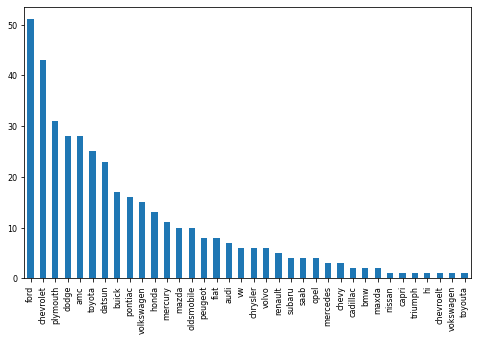

In [ ]:
#use value_counts to plot the different typs of cars 
plt.figure(figsize=(8,5))
df['company'].value_counts().plot(kind='bar', fontsize = 8)

#Analyze Non-Categorical Data

Here I will create some initial charts and references for the non-categorical data.

In [ ]:
#get the numerical data by first setting up a way to refer to the numerical column names
numerical_columns = column_names.remove('company')

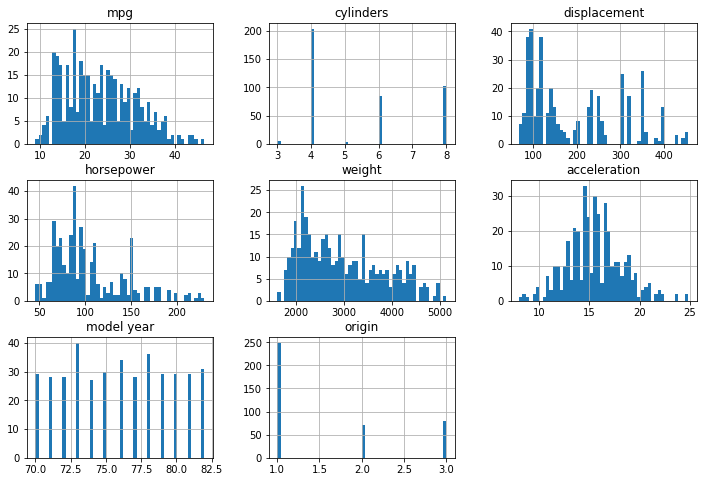

In [ ]:
#create a dataframe that just houses the numerical data
df_numerical = df.drop(['company'],axis = 1)

df_numerical.hist(bins=50, figsize=(12,8))
plt.show()

##Histograms

The above verifies our undestanding of the data in so far as recognizing several important factors:

1. Discrete features: origin, model year, cylinders
2. The acceleration and displacement stand out as being different from the other continuous data

##Correlation Matrix

We are now going to use a correlation matrix to analyze the relationship between data. We use seaborn to do this.

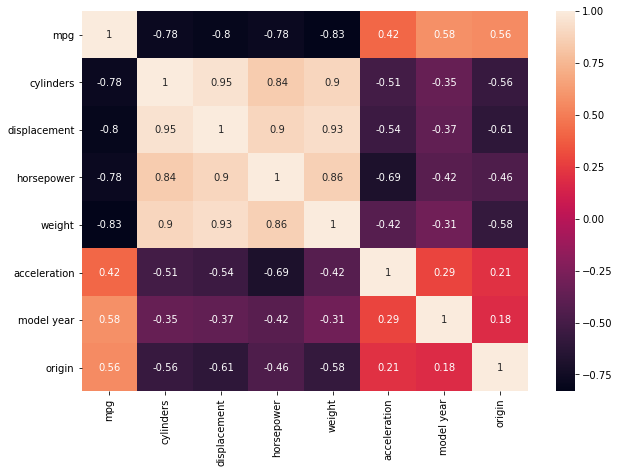

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#I see that mpg has a lot of correlated features, so let's look at it by itself, ordered
corrMatrix["mpg"].sort_values(ascending=False)

mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

We see that there are a lot of variables that have very high positive and negative correlation to mpg. It may be something to explore further.

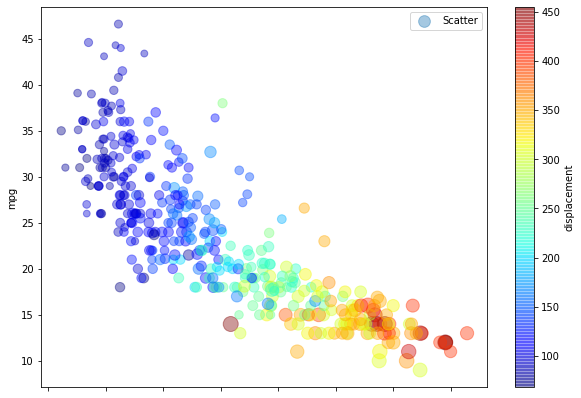

In [ ]:
#using a scatter plot to look at individual comparisons
#s is the circle size
#c is the color
df.plot(kind="scatter", x="weight", y="mpg", alpha=0.4,
    s=df["horsepower"], label="Scatter", figsize=(10,7),
    c="displacement", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1eb52ff98>,
      dtype=object)

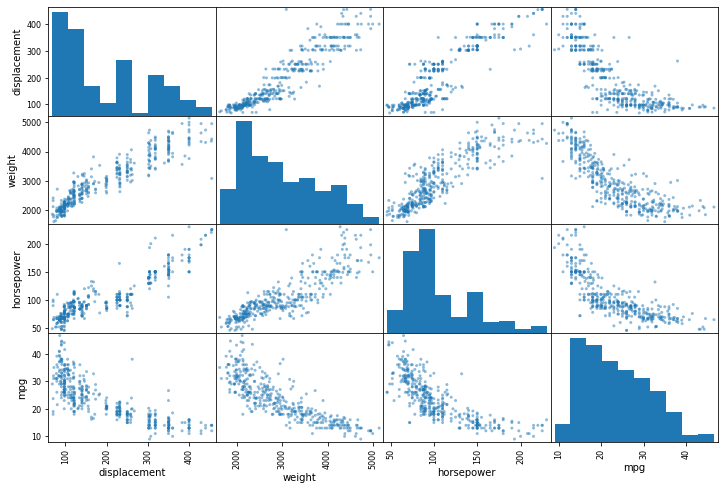

In [ ]:
#let's now look at a few good attributes to compare
#we want to see if we are missing anything in a non-linear relationship
from pandas.plotting import scatter_matrix

attributes = ['displacement','weight','horsepower','mpg']
scatter_matrix(df[attributes], figsize=(12, 8))

We see that the relationship with several variables should be tested as a log or other regression, rather than just a linear regression, as the curve in some cases is somewhat pronounced.

#Dealing with Missing Data

Most Machine Learning algorithms cannot work with missing features.  We have three options:

* Get rid of the missing data (the entire row)
* Get rid of the whole attribute
* Set the values to zero, the mean, the median, etc.

We can use DataFrame methods **dropna()**, **drop()**, and **fillna()** to do this:

```python
df.dropna(subset=["horsepower"])    # option 1
df.drop("horsepower", axis=1)       # option 2
median = df["horsepower"].median()  # option 3
df["horsepower"].fillna(median, inplace=True)
```

In [ ]:
#checking for missing data
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
company         0
dtype: int64

##Example of Imputing

In [ ]:
#import the SimpleImputer library
from sklearn.impute import SimpleImputer

#create a second data set to test it on
df_SI = df.copy()

#drop the categorical data so that the Imputer will work right
df_SI.drop(['company'], axis = 1, inplace=True)

#call the imputer with the strategy you want
imp = SimpleImputer( missing_values = np.nan, strategy='median')

#note that SimpleImputer returns a numpy array, which is not what I want
#I fit it into a dataframe, but have to reassign the names and put back the company column
df_SI = pd.DataFrame(imp.fit_transform(df_SI))

#replace the column names using the previously made list called column_names
df_SI.columns = column_names


#after testing this, I noticed that my df_SI index starts from 0 and not 1
#this is messing up when I try and put 'company' back with the data, since its index starts from 1
#so I increment the index and only then add the column back in
df_SI.index += 1

#add the company column back in
df_SI['company'] = df['company']

#check that it all worked
df_SI.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford


#LabelEncoder

Since we have categorical data, we will not be able to make reasonable comparisons unless we first convert it into numbers.  Of course, converting it doesn't make it good for regressions, but perhaps there is some info we can drag out of it nevertheless.

BUT, this is a bad idea here. There is no meaningful representation of the numbers in a regression (perhaps other models would be OK though).  Instead we want to use, get_dummies() or just drop the category for this model.

In [ ]:
from sklearn import preprocessing

#set up LabelEncoding
le = preprocessing.LabelEncoder()
interim = le.fit_transform(df_SI['company'])

#place it back into a dataframe
interim = pd.DataFrame(interim)
interim.columns = ['company']

#place the new values back in df_SI
df_SI['company'] = interim['company']

#check
df_SI.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,3.0
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,24.0
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.0
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,13.0
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,13.0


##Dropping the Categorical Data

I am going to be doing a regression, so I will drop the categorical data (even if it is in numeric form, it doesn't help). I will also drop 'model year', because although it is a number, it is not meaningful as a number.

In [ ]:
df_SI.drop(['company','model year'], axis = 1, inplace= True)

#Scaling

We will scale the features so that we are comparing apples to apples.



In [ ]:
from sklearn import preprocessing

#use the preprocessing MinMaxScaler to make the 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_SI)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = ['mpg',	'cylinders',	'displacement',	'horsepower',	'weight',	'acceleration',	'origin']

df_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0


#Create a Model

We will start with a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

#take out mpg, because that is what we are going to be studying
y = df_scaled['mpg'].copy()
X = df_scaled.drop(['mpg'], axis = 1)

lin_reg = LinearRegression().fit(X,y)
r_sq = lin_reg.score(X, y)

print(r_sq)

0.718145378644061


#Regressions with Statistics

Here we use the statsmodel.api to show the statistics. See [here](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html).
If you are wondering why we get a different R^2 for 

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              498.9
Date:                Wed, 02 Dec 2020   Prob (F-statistic):                   4.54e-180
Time:                        03:31:32   Log-Likelihood:                          192.60
No. Observations:                 398   AIC:                                     -373.2
Df Residuals:                     392   BIC:                                     -349.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------